In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_excel("Dados1.xlsx")
df2 = pd.read_excel("Dados2.xlsx")


df2.tail()

Source                     Target  Weight
465  Movimentação e patio 3     Lider de planejamento1       9
466  Movimentação e patio 3  Encarregado da produção 2       2
467  Movimentação e patio 3           Lider da Pintura       6
468  Movimentação e patio 3        Lider de expedição2       6
469  Movimentação e patio 3     Movimentação e patio 2       5

### Contrução do grafo (Digrafo)

In [4]:
QN1 = nx.DiGraph()

for indice in df1.index:
    linha = df1.loc[indice]
    QN1.add_edge(linha['Source'], linha['Target'], weight=linha['Weight'])

In [5]:
QN2 = nx.DiGraph()

for indice in df2.index:
    linha = df2.loc[indice]
    QN2.add_edge(linha['Source'], linha['Target'], weight=linha['Weight'])

In [6]:
## (1) Número de nós ou atores do dígrafo.
QN2.number_of_nodes()

94

In [7]:
## (2) Número de arestas ou interações únicas e direcionadas do dígrafo.
QN2.number_of_edges()

462

In [8]:
## (3) Verificando se o digrafo é totalmente conectado.
nx.is_connected(QN2.to_undirected())


True

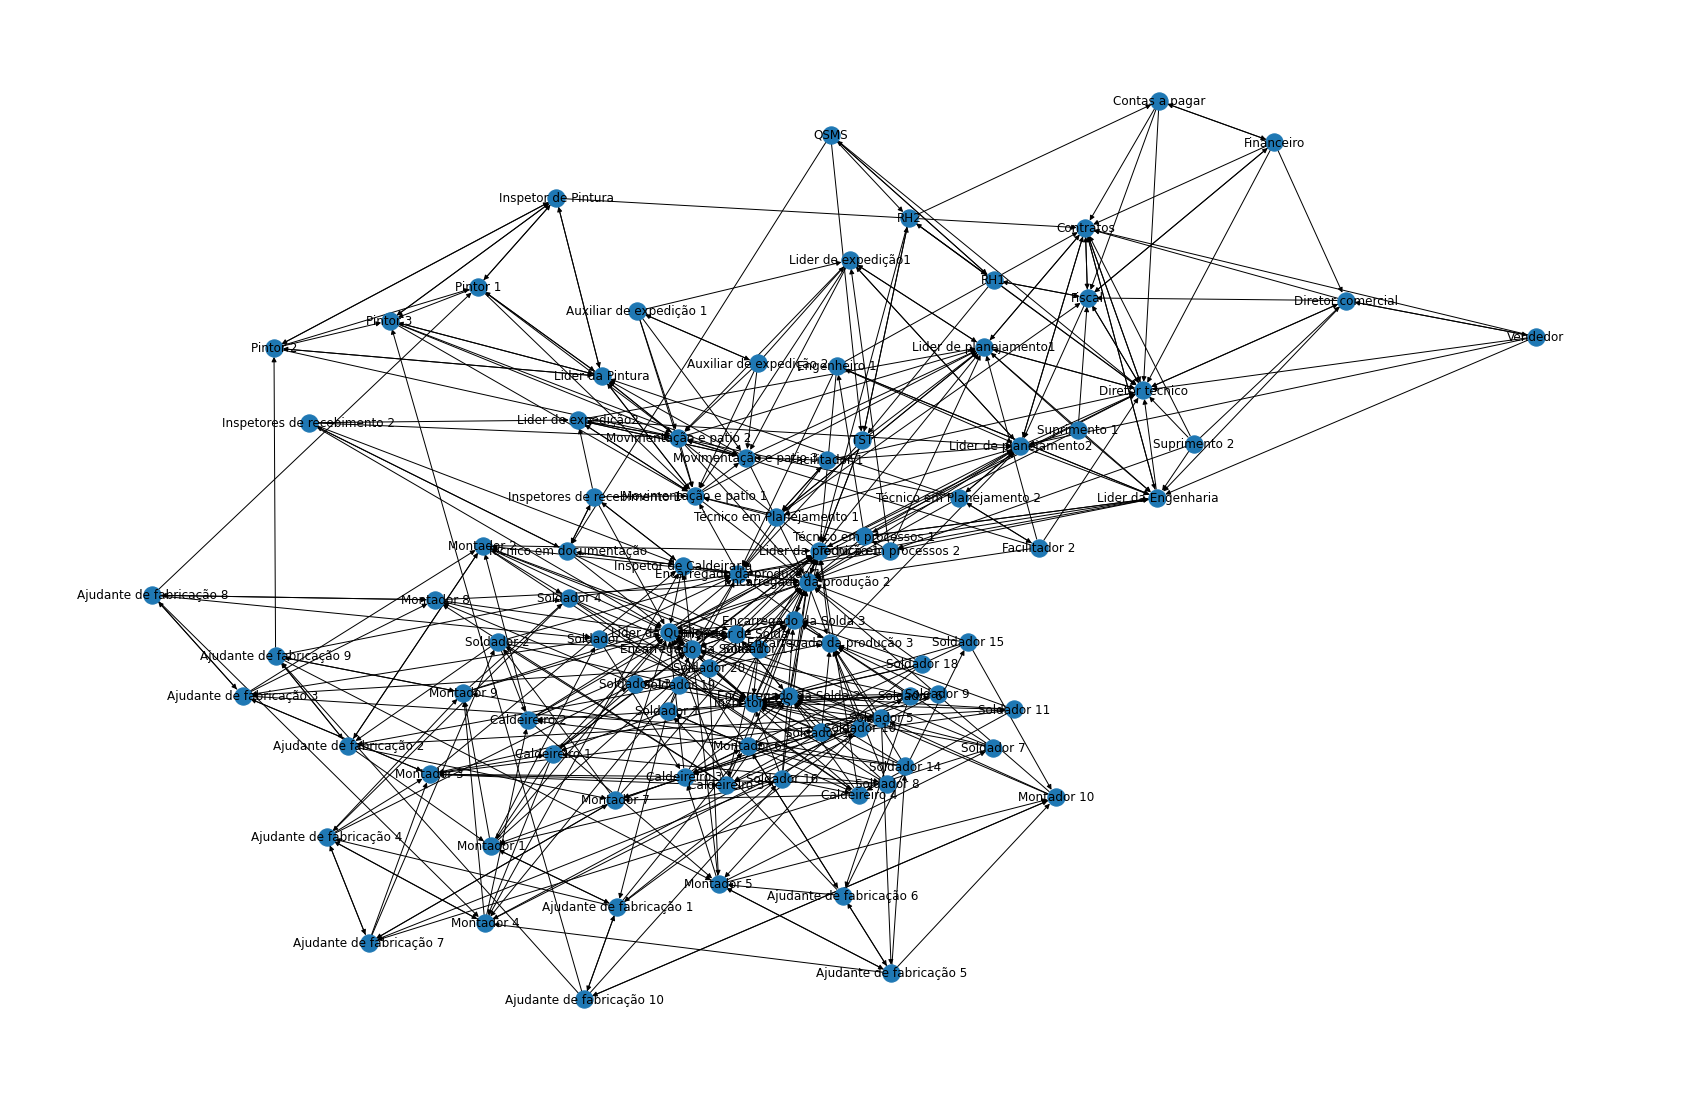

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(30,20))

#VERTICES AGRUPADOS PELO GRAU (interessante para ver os "Clusters")

#nx.draw_kamada_kawai(GoT,  ax=ax)
nx.draw_kamada_kawai(QN2, with_labels=True, ax=ax)

#VERTICES AGRUPADOS PELO GRAU (interessante para ver os "Arestas")

#nx.draw_circular(GoT, with_labels=True, ax=ax)
#nx.draw_shell(GoT, with_labels=True, ax=ax)



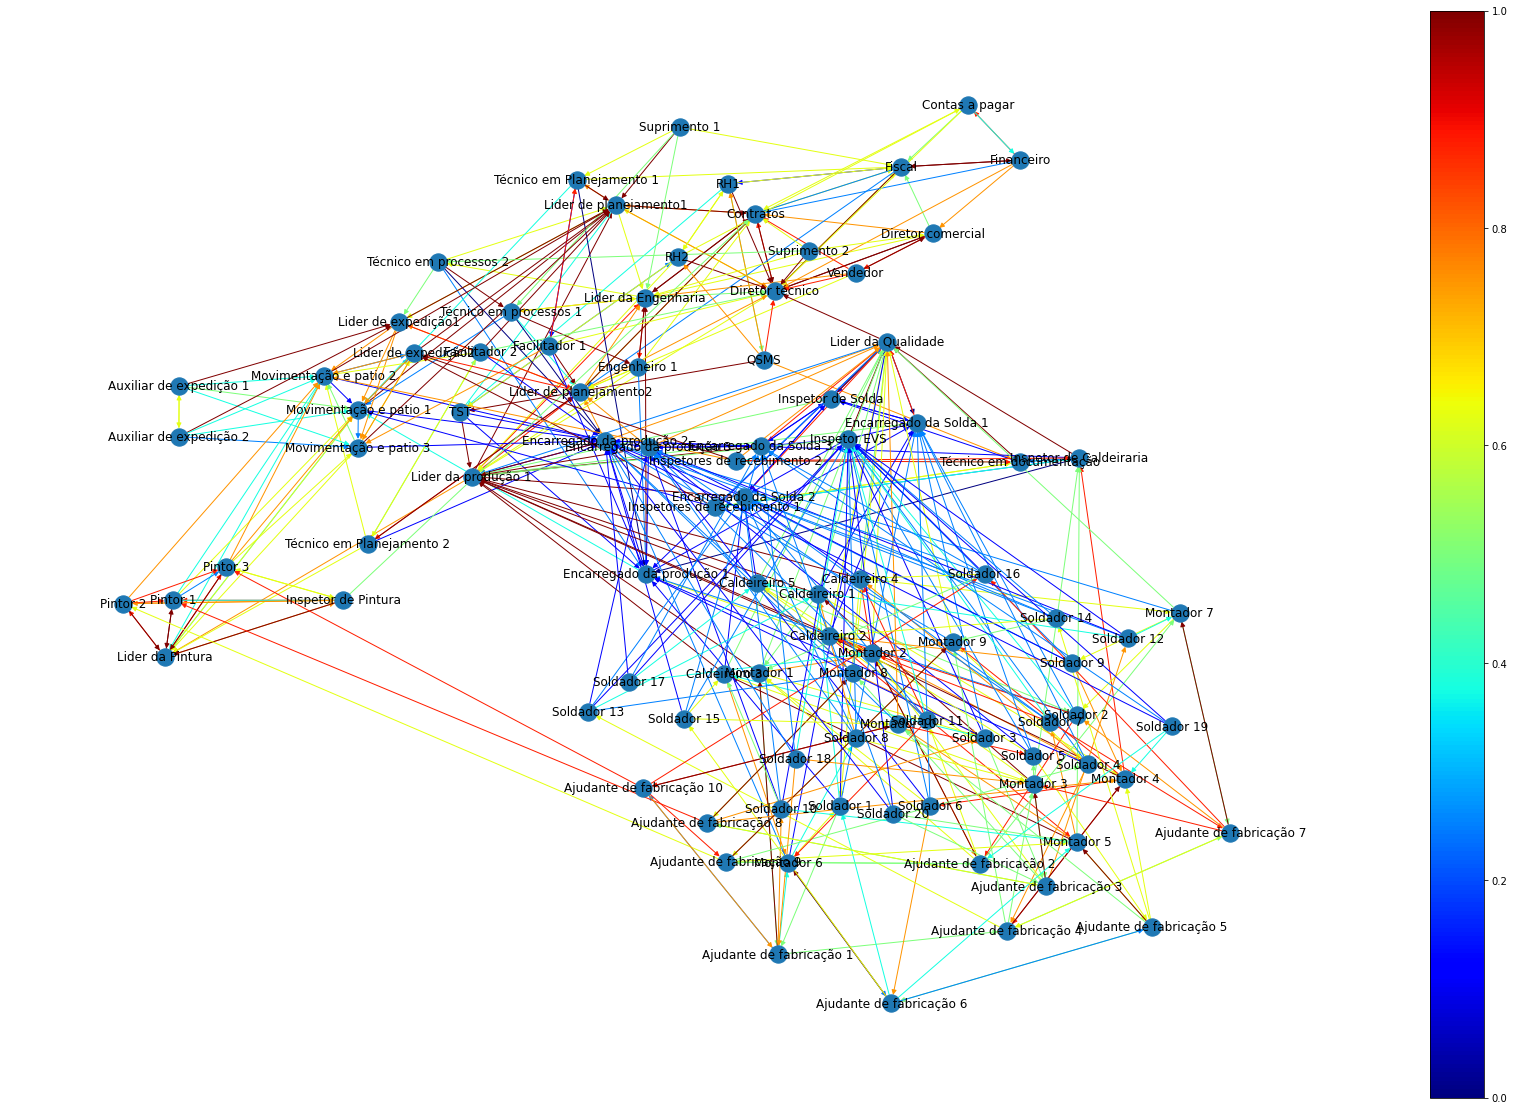

In [10]:
## (4) Representação visual do dígrafo da rede complexa.
_max = max(df2['Weight'].values)
_min = min(df2['Weight'].values)

r = _max - _min

fig, ax = plt.subplots(1,1, figsize=(30, 20))

cb = nx.draw_spring(QN2, with_labels=True, ax=ax, edge_color=[(peso-_min)/r for a, b, peso in QN2.edges().data('weight')], 
                   edge_cmap= plt.get_cmap("jet"))

sm = plt.cm.ScalarMappable(cmap='jet')
sm.set_array([])
cbar = plt.colorbar(sm)

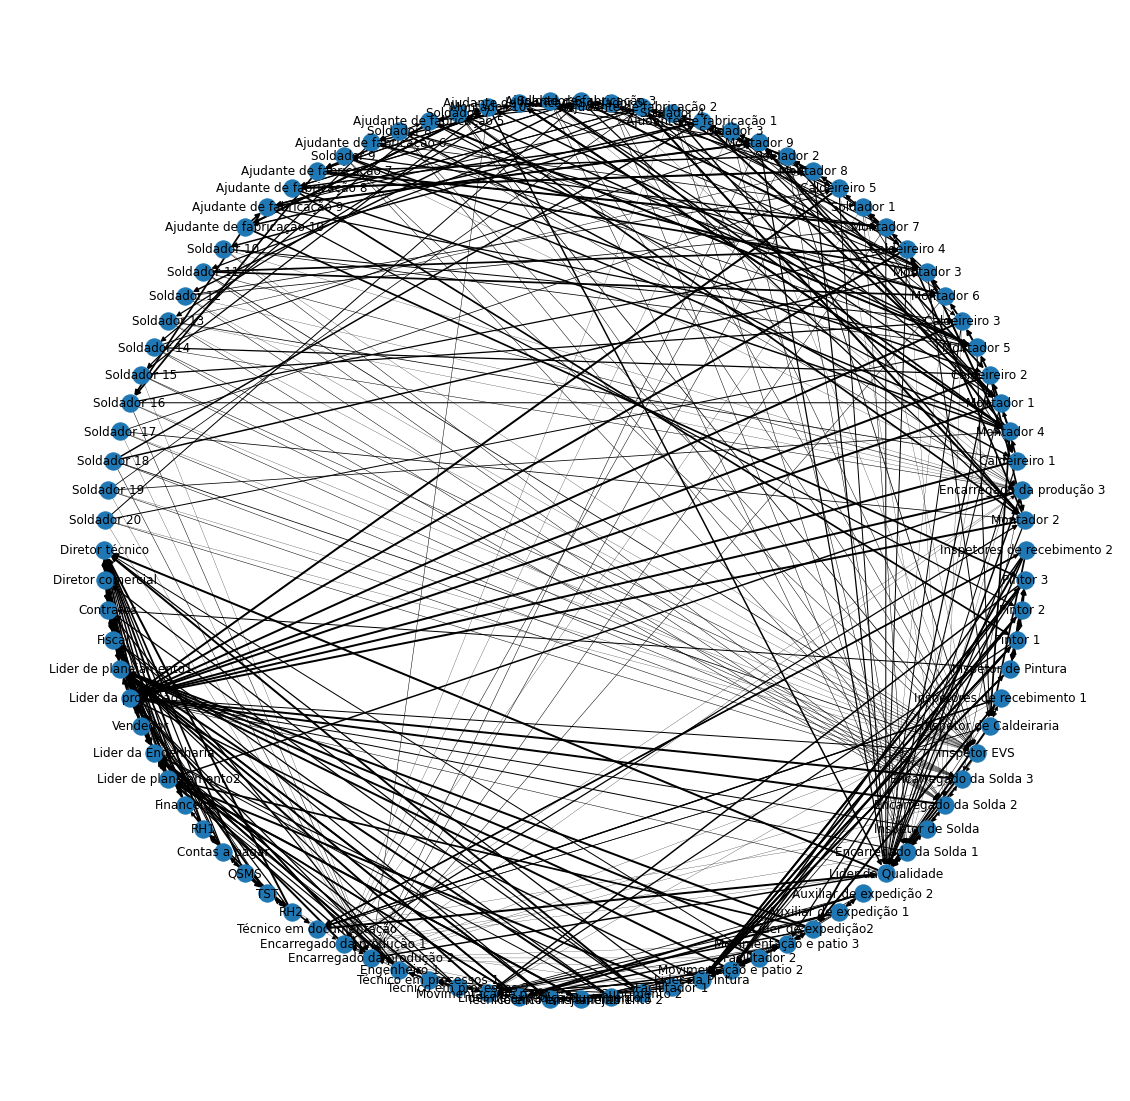

In [11]:
_max = max(df2['Weight'].values)
_min = min(df2['Weight'].values)

r = _max - _min

fig, ax = plt.subplots(1,1, figsize=(20,20))

cb = nx.draw_shell(QN2, with_labels=True,ax=ax, width=[(((peso -_min)/r)*2) for a, b, peso in QN2.edges().data('weight')])
                    



Analise

Graus

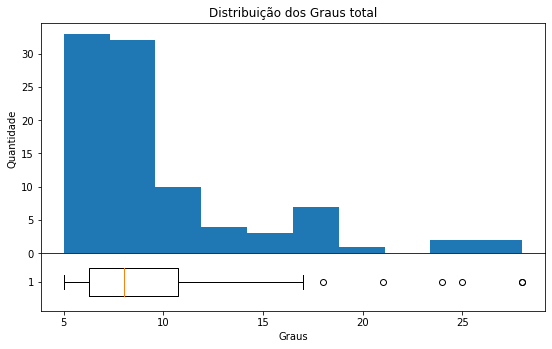

In [12]:
## (5) Distribuição dos Graus total
graus = [grau for vertice, grau in QN2.degree()]
fig = plt.figure(1, figsize=(7,4))
ax_hist = plt.axes([0, .2, 1, .8])
ax_box = plt.axes([0, .0, 1, .2])
#Plotar o Histograma
ax_hist.hist(graus)
ax_hist.set_title("Distribuição dos Graus total")
ax_hist.set_ylabel("Quantidade")
#Plotar o Boxplot
ax_box.set_xlabel("Graus")
ax_box.boxplot(graus, widths = .5, vert=False)
plt.show()

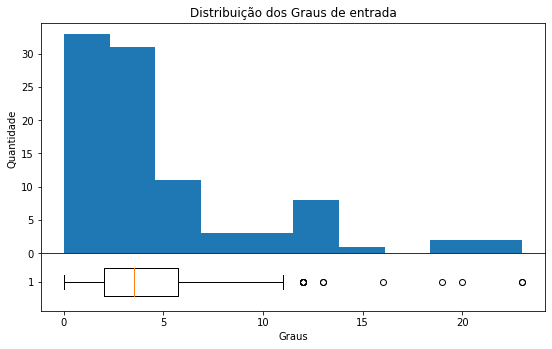

In [13]:
## (6) Distribuição dos Graus de entrada
graus = [grau for vertice, grau in QN2.in_degree()]
fig = plt.figure(1, figsize=(7,4))
ax_hist = plt.axes([0, .2, 1, .8])
ax_box = plt.axes([0, .0, 1, .2])
#Plotar o Histograma
ax_hist.hist(graus)
ax_hist.set_title("Distribuição dos Graus de entrada")
ax_hist.set_ylabel("Quantidade")
#Plotar o Boxplot
ax_box.set_xlabel("Graus")
ax_box.boxplot(graus, widths = .5, vert=False)
plt.show()

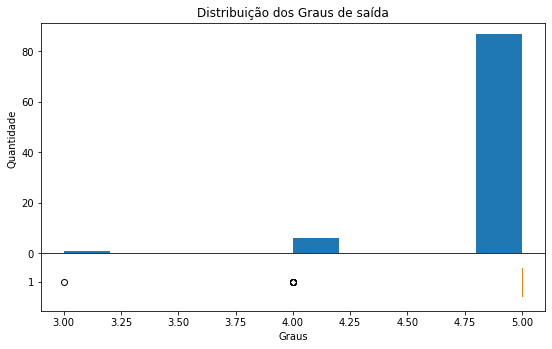

In [14]:
## (7) Distribuição dos Graus de saída
graus = [grau for vertice, grau in QN2.out_degree()]
fig = plt.figure(1, figsize=(7,4))
ax_hist = plt.axes([0, .2, 1, .8])
ax_box = plt.axes([0, .0, 1, .2])
#Plotar o Histograma
ax_hist.hist(graus)
ax_hist.set_title("Distribuição dos Graus de saída")
ax_hist.set_ylabel("Quantidade")
#Plotar o Boxplot
ax_box.set_xlabel("Graus")
ax_box.boxplot(graus, widths = 0.5, vert=False)
plt.show()

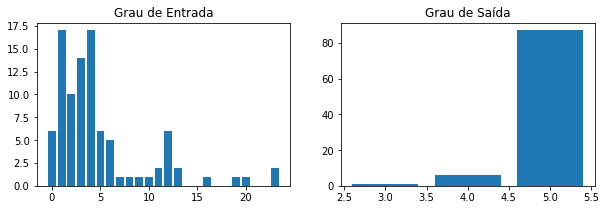

In [15]:
import collections

in_degree_sequence = sorted([d for n, d in QN2.in_degree()], reverse=True)
out_degree_sequence = sorted([d for n, d in QN2.out_degree()], reverse=True)

histograma_in = collections.Counter(in_degree_sequence)
histograma_out = collections.Counter(out_degree_sequence )
in_deg, in_cont = zip(*histograma_in.items())
out_deg, out_cont = zip(*histograma_out.items())

fig, ax = plt.subplots(1,2, figsize=(10,3))

ax[0].bar(in_deg, in_cont)
ax[0].set_title("Grau de Entrada")
ax[1].bar(out_deg, out_cont)
ax[1].set_title("Grau de Saída");

In [16]:
#Numero médio de conexões 2*numero de arestas / numero de nos

(2*QN1.number_of_edges())/QN1.number_of_nodes()

9.910112359550562

In [17]:
pesos_arestas = sorted([p for a, b, p in QN1.edges().data('weight')])
print(pesos_arestas)

[2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 

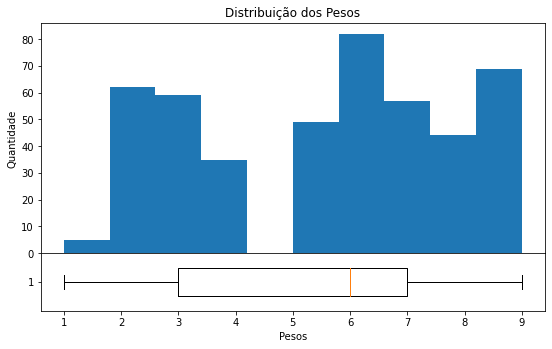

In [18]:
## (8) Distribuição dos Pesos das arestas.
pesos_arestas = sorted([p for a, b, p in QN2.edges().data('weight')])
graus = [grau for vertice, grau in QN1.degree()]
fig = plt.figure(1, figsize=(7,4))
ax_hist = plt.axes([0, .2, 1, .8])
ax_box = plt.axes([0, .0, 1, .2])
ax_hist.hist(pesos_arestas)
ax_hist.set_title("Distribuição dos Pesos")
ax_hist.set_ylabel("Quantidade")
ax_box.set_xlabel("Pesos")
ax_box.boxplot(pesos_arestas, widths = .5, vert=False)
plt.show()

Força

In [19]:
forcas = sorted([v for k, v in nx.degree(QN1, weight='weight')])
print(forcas)

[24, 26, 26, 29, 31, 31, 32, 32, 34, 35, 35, 36, 38, 38, 39, 39, 39, 39, 39, 41, 42, 43, 43, 45, 45, 45, 45, 46, 46, 46, 46, 47, 47, 47, 47, 48, 48, 48, 48, 48, 49, 50, 51, 51, 52, 52, 52, 52, 53, 54, 55, 55, 56, 56, 56, 56, 58, 59, 59, 59, 60, 60, 61, 61, 66, 68, 68, 69, 70, 71, 71, 72, 74, 75, 80, 80, 81, 95, 101, 111, 113, 120, 122, 133, 136, 145, 157, 263, 323]


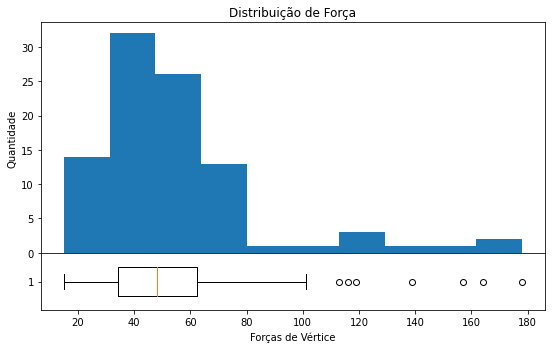

In [20]:
## (9) Distribuição dos Foças dos Vértices.
forcas = sorted([v for k, v in nx.degree(QN2, weight='weight')])
fig = plt.figure(1, figsize = (7,4))
ax_hist = plt.axes([0, .2, 1, .8])
ax_box = plt.axes([0, .0, 1, .2])
ax_hist.hist(forcas)
ax_hist.set_title("Distribuição de Força")
ax_hist.set_ylabel("Quantidade")
ax_box.set_xlabel("Forças de Vértice")
ax_box.boxplot(forcas, widths = .5, vert=False)
plt.show()



Metricas Baseadas em Distancias

Distribuiçao das distancias Minimas

Esta metrica diz o quão avastados estão os atores


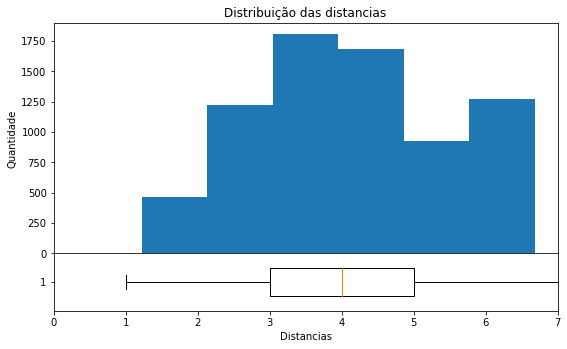

In [21]:
## (10) Distribuição das distancias entre os vértices

d_ij = [k for k in nx.shortest_path_length(QN2)]
distancias = []
for _, d in d_ij:
    tmp = [v for v in d.values() if v> 0]
    distancias.extend(tmp)
    
fig = plt.figure(1, figsize=(7,4))
ax_hist = plt.axes([0, .2, 1, .8])
ax_box = plt.axes([0, .0, 1, .2]) 
ax_hist.hist(distancias, align='mid', bins=range(0,8))
ax_hist.set_title("Distribuição das distancias")
ax_hist.set_ylabel("Quantidade")
ax_box.set_xlabel("Distancias")
ax_box.boxplot(distancias, widths = 0.5, vert=False)
ax_box.set_xlim([0,7])
plt.show()

Distribuição das Execentricidades



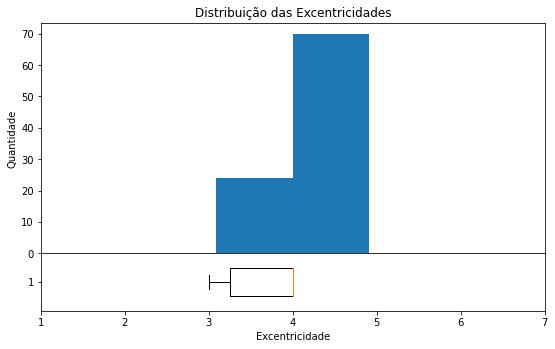

In [22]:
## (11) Distribuição das Excentricidades - Distancia deu um vértice a outro vértice mais periférico na rede
e_v = nx.eccentricity(QN2.to_undirected())
e = sorted([v for v in e_v.values()])
fig = plt.figure(1, figsize=(7,4))
ax_hist = plt.axes([0, .2, 1, .8])
ax_box = plt.axes([0, .0, 1, .2])
ax_hist.hist(e, align='mid', bins=[1,2,3,4,5,6,7])
ax_hist.set_title("Distribuição das Excentricidades")
ax_hist.set_ylabel("Quantidade")
ax_box.set_xlabel("Excentricidade")
ax_box.boxplot(e, widths = .5, vert=False)
ax_box.set_xlim([1,7])
plt.show()

In [23]:
nx.radius(QN1.to_undirected())

3

In [24]:
nx.diameter(QN1.to_undirected())

5

In [25]:
nx.center(QN1.to_undirected())

['Lider da produção 1',
 'Lider da Engenharia',
 'Lider de planejamento2',
 'TST',
 'Técnico em documentação',
 'Encarregado da produção 1',
 'Encarregado da produção 2',
 'Engenheiro 1',
 'Técnico em processos 1',
 'Técnico em processos 2',
 'Movimentação e patio 1',
 'Técnico em Planejamento 1',
 'Técnico em Planejamento 2',
 'Facilitador 1',
 'Facilitador 2',
 'Movimentação e patio 2',
 'Movimentação e patio 3',
 'Lider da Qualidade',
 'Encarregado da Solda 1',
 'Inspetor de Caldeiraria',
 'Inspetores de recebimento 1',
 'Inspetores de recebimento 2']

In [26]:
nx.periphery(QN1.to_undirected())

['Financeiro',
 'Contas a pagar',
 'Ajudante de fabricação 1',
 'Ajudante de fabricação 2',
 'Ajudante de fabricação 3',
 'Ajudante de fabricação 4',
 'Ajudante de fabricação 5',
 'Ajudante de fabricação 6',
 'Ajudante de fabricação 7']

In [27]:
nx.density(QN1)

0.05630745658835547

In [28]:
cliques = nx.find_cliques(QN1.to_undirected())

[k for k in cliques]

[['Ajudante de fabricação 5', 'Montador 4'],
 ['Ajudante de fabricação 5', 'Montador 5', 'Montador 10'],
 ['Ajudante de fabricação 5', 'Montador 5', 'Ajudante de fabricação 6'],
 ['Ajudante de fabricação 5', 'Soldador 14'],
 ['Ajudante de fabricação 5', 'Soldador 5', 'Montador 10'],
 ['Fiscal', 'Suprimento 1', 'Técnico em Planejamento 1'],
 ['Fiscal', 'Diretor técnico', 'Contratos', 'Lider de planejamento2'],
 ['Fiscal', 'Diretor técnico', 'Contratos', 'Financeiro', 'Contas a pagar'],
 ['Fiscal', 'Diretor técnico', 'Contratos', 'Financeiro', 'Diretor comercial'],
 ['Fiscal', 'Diretor técnico', 'RH1'],
 ['Lider de planejamento2',
  'Lider da Engenharia',
  'Lider da produção 1',
  'Engenheiro 1'],
 ['Lider de planejamento2',
  'Lider da Engenharia',
  'Lider da produção 1',
  'Diretor técnico'],
 ['Lider de planejamento2',
  'Lider da Engenharia',
  'Contratos',
  'Engenheiro 1'],
 ['Lider de planejamento2',
  'Lider da Engenharia',
  'Contratos',
  'Diretor técnico',
  'Vendedor'],
 ['

Centralidades de Vértices e Arestas

In [29]:
dados = {}


In [30]:
cd = pd.DataFrame([(c, v) for c,v in nx.degree_centrality(QN1).items()], columns=['Personagem', 'Cd'])
cd.sort_values('Cd', ascending=False)

Personagem        Cd
16    Encarregado da produção 1  0.511364
35       Encarregado da Solda 1  0.386364
36            Inspetor de Solda  0.318182
40      Inspetor de Caldeiraria  0.261364
0               Diretor técnico  0.238636
..                          ...       ...
47  Inspetores de recebimento 1  0.056818
85                  Soldador 17  0.056818
86                  Soldador 18  0.056818
87                  Soldador 19  0.056818
88                  Soldador 20  0.056818

[89 rows x 2 columns]

In [31]:
#Centraliade de grau de entrada (mais pessoas se reportam para eles) 
 
cd = pd.DataFrame([(c, v) for c,v in nx.in_degree_centrality(QN1).items()], columns=['Personagem', 'Cd_in'])
cd.sort_values('Cd_in', ascending=False)

Personagem     Cd_in
16  Encarregado da produção 1  0.454545
35     Encarregado da Solda 1  0.329545
36          Inspetor de Solda  0.261364
40    Inspetor de Caldeiraria  0.204545
0             Diretor técnico  0.181818
..                        ...       ...
25               Suprimento 1  0.000000
85                Soldador 17  0.000000
86                Soldador 18  0.000000
87                Soldador 19  0.000000
88                Soldador 20  0.000000

[89 rows x 2 columns]

In [32]:
#Centraliade de grau de saida (ela se comunica com mais pessoas)

cd = pd.DataFrame([(c, v) for c,v in nx.out_degree_centrality(QN1).items()], columns=['Personagem', 'Cd_out'])
cd.sort_values('Cd_out', ascending=False)

Personagem    Cd_out
0            Diretor técnico  0.056818
54                Montador 6  0.056818
64  Ajudante de fabricação 1  0.056818
63                Soldador 3  0.056818
61                Soldador 2  0.056818
..                       ...       ...
88               Soldador 20  0.056818
11            Contas a pagar  0.045455
60                Montador 8  0.045455
62                Montador 9  0.045455
69               Montador 10  0.045455

[89 rows x 2 columns]

In [33]:
#Centralidade de proximidade é quem está mais proximod da rede como um todo

cd = pd.DataFrame([(c,v) for c,v in nx.closeness_centrality(QN1).items()], columns=['Personagem', 'Cc'])
cd.sort_values('Cc', ascending=False)

Personagem        Cc
16  Encarregado da produção 1  0.611111
35     Encarregado da Solda 1  0.497175
7         Lider da Engenharia  0.453608
21     Movimentação e patio 1  0.448980
5         Lider da produção 1  0.433498
..                        ...       ...
26               Suprimento 2  0.000000
85                Soldador 17  0.000000
86                Soldador 18  0.000000
87                Soldador 19  0.000000
88                Soldador 20  0.000000

[89 rows x 2 columns]

In [34]:
#Centralidade de intermediação (Betweenness) - NED intermedia 5% de toda a comunicação da rede

cd = pd.DataFrame([(c,v) for c,v in nx.betweenness_centrality(QN1).items()], columns=['Personagem', 'Cb'])
cd.sort_values('Cb', ascending=False)


Personagem        Cb
16  Encarregado da produção 1  0.292301
41                 Montador 1  0.130886
0             Diretor técnico  0.098985
35     Encarregado da Solda 1  0.093939
36          Inspetor de Solda  0.087220
..                        ...       ...
25               Suprimento 1  0.000000
26               Suprimento 2  0.000000
32    Auxiliar de expedição 1  0.000000
33    Auxiliar de expedição 2  0.000000
88                Soldador 20  0.000000

[89 rows x 2 columns]

In [35]:
#Centralidade de intermediação - Arestas (Betweenness) - JORAH, NED intermedia 0.8% de toda a comunicação da rede

cd = pd.DataFrame([(c,v) for c,v in nx.edge_betweenness_centrality(QN1).items()], columns=['Personagem', 'Cb'])
cd.sort_values('Cb', ascending=False)


Personagem        Cb
80             (Encarregado da produção 1, Montador 1)  0.107399
207             (Montador 1, Ajudante de fabricação 1)  0.069297
81             (Encarregado da produção 1, Montador 2)  0.066983
19                                       (Fiscal, RH1)  0.058845
79    (Encarregado da produção 1, Lider da Engenharia)  0.054043
..                                                 ...       ...
132                (Suprimento 2, Lider da Engenharia)  0.000351
153   (Movimentação e patio 2, Movimentação e patio 1)  0.000345
62                                         (QSMS, RH1)  0.000277
165  (Auxiliar de expedição 2, Auxiliar de expediçã...  0.000128
160  (Auxiliar de expedição 1, Auxiliar de expediçã...  0.000128

[441 rows x 2 columns]

In [36]:
#Centralidade de aproximidade similar a betweenness_centrality
cd = pd.DataFrame([(c,v) for c,v in nx.load_centrality(QN1).items()], columns=['Personagem', 'Cb'])
cd.sort_values('Cb', ascending=False)

Personagem        Cb
16  Encarregado da produção 1  0.297291
41                 Montador 1  0.131226
0             Diretor técnico  0.088447
35     Encarregado da Solda 1  0.088012
7         Lider da Engenharia  0.085092
..                        ...       ...
25               Suprimento 1  0.000000
26               Suprimento 2  0.000000
32    Auxiliar de expedição 1  0.000000
33    Auxiliar de expedição 2  0.000000
88                Soldador 20  0.000000

[89 rows x 2 columns]

In [37]:
#Centralidade de aproximidade similar a betweenness_centrality - Arestas
cd = pd.DataFrame([(c,v) for c,v in nx.edge_load_centrality(QN1).items()], columns=['Personagem', 'Cb'])
cd.sort_values('Cb', ascending=False)

Personagem           Cb
130            (Encarregado da produção 1, Montador 1)  1205.302778
131            (Montador 1, Encarregado da produção 1)  1205.302778
132            (Encarregado da produção 1, Montador 2)   801.569444
133            (Montador 2, Encarregado da produção 1)   801.569444
340             (Montador 1, Ajudante de fabricação 1)   757.229167
..                                                 ...          ...
252   (Movimentação e patio 2, Movimentação e patio 1)    90.000000
260   (Movimentação e patio 3, Movimentação e patio 2)    90.000000
253   (Movimentação e patio 1, Movimentação e patio 2)    90.000000
264  (Auxiliar de expedição 1, Auxiliar de expediçã...    89.000000
265  (Auxiliar de expedição 2, Auxiliar de expediçã...    89.000000

[756 rows x 2 columns]

In [38]:
#Centralidade de fluxo caminho aleatorio
cd = pd.DataFrame([(c,v) for c,v in nx.current_flow_betweenness_centrality(QN1.to_undirected()).items()], columns=['Personagem', 'Crw'])
cd.sort_values('Crw', ascending=False)

Personagem       Crw
16  Encarregado da produção 1  0.297442
35     Encarregado da Solda 1  0.131369
17  Encarregado da produção 2  0.131028
40    Inspetor de Caldeiraria  0.118912
36          Inspetor de Solda  0.106462
..                        ...       ...
87                Soldador 19  0.016250
6                    Vendedor  0.016011
32    Auxiliar de expedição 1  0.015235
33    Auxiliar de expedição 2  0.015235
85                Soldador 17  0.013903

[89 rows x 2 columns]

In [39]:
#apenas para demostrar o algoritimo não usar no tcc

from networkx.linalg.graphmatrix import adjacency_matrix

m = adjacency_matrix(QN1).todense()

print(m)

[[0 9 8 ... 0 0 0]
 [9 0 7 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [40]:
#apenas para demostrar o algoritimo na suar no tcc
np.linalg.eig(m)

(array([  0.        +0.j        ,   0.        +0.j        ,
          0.        +0.j        ,   0.        +0.j        ,
          0.        +0.j        ,   0.        +0.j        ,
          0.        +0.j        ,   0.        +0.j        ,
         33.57983353+0.j        ,  26.80626003+0.j        ,
         26.16000972+0.j        ,  16.90644632+0.j        ,
         15.26234999+0.j        , -15.65688111+0.j        ,
         12.98585542+0.39637958j,  12.98585542-0.39637958j,
         11.91128312+1.69272075j,  11.91128312-1.69272075j,
          6.87026217+8.64604923j,   6.87026217-8.64604923j,
        -12.70233956+4.72579262j, -12.70233956-4.72579262j,
         10.39126852+0.j        ,   9.4049585 +2.6433995j ,
          9.4049585 -2.6433995j , -13.23572178+0.j        ,
          3.79003482+7.97081648j,   3.79003482-7.97081648j,
         -9.73015139+5.86291555j,  -9.73015139-5.86291555j,
          8.00094547+0.68881017j,   8.00094547-0.68881017j,
         -2.57854821+8.51840835j,  -2.57

In [41]:
#apenas para demostrar o algoritimo na suar no tcc
n = QN1.number_of_nodes()
l=1

ce = np.repeat(1/n, n)

for ix in range(l):
    tmp = np.zeros(n)
    for i in range(n):
        tmp[i]= 1/l * np.sum([m[i, j] * ce[j] for j in range(n)])
    ce = tmp
ce



array([0.39325843, 0.39325843, 0.41573034, 0.29213483, 0.39325843,
       0.42696629, 0.42696629, 0.39325843, 0.42696629, 0.38202247,
       0.33707865, 0.23595506, 0.42696629, 0.30337079, 0.37078652,
       0.30337079, 0.34831461, 0.41573034, 0.39325843, 0.29213483,
       0.35955056, 0.28089888, 0.42696629, 0.26966292, 0.34831461,
       0.34831461, 0.35955056, 0.40449438, 0.42696629, 0.34831461,
       0.26966292, 0.37078652, 0.31460674, 0.29213483, 0.29213483,
       0.35955056, 0.37078652, 0.40449438, 0.38202247, 0.30337079,
       0.28089888, 0.35955056, 0.41573034, 0.39325843, 0.29213483,
       0.43820225, 0.39325843, 0.26966292, 0.43820225, 0.33707865,
       0.46067416, 0.42696629, 0.38202247, 0.35955056, 0.26966292,
       0.33707865, 0.35955056, 0.34831461, 0.31460674, 0.34831461,
       0.31460674, 0.4494382 , 0.30337079, 0.30337079, 0.31460674,
       0.34831461, 0.35955056, 0.35955056, 0.33707865, 0.35955056,
       0.4494382 , 0.34831461, 0.39325843, 0.29213483, 0.40449

In [42]:
#centralidade de autovetor -Ned é a pessoa mais importante na rede pois se conencta com as pessoas mais importantes

cd = pd.DataFrame([(c,v) for c,v in nx.eigenvector_centrality(QN1.to_undirected()).items()], columns=['Personagem', 'CeA'])
cd.sort_values('CeA', ascending=False)

Personagem       CeA
16  Encarregado da produção 1  0.411217
35     Encarregado da Solda 1  0.340462
36          Inspetor de Solda  0.235634
40    Inspetor de Caldeiraria  0.210046
17  Encarregado da produção 2  0.170092
..                        ...       ...
10                        RH1  0.021137
45                   Pintor 2  0.020212
11             Contas a pagar  0.019052
9                  Financeiro  0.018973
43        Inspetor de Pintura  0.015516

[89 rows x 2 columns]

In [43]:
#Cnetralidade de pagerank  - a otica a ser analisada é sobre uma rede direcionada, ou seja é importante a direçao com quem o fluxo aponta
cd = pd.DataFrame([(c,v) for c,v in nx.pagerank(QN1).items()], columns=['Personagem', 'Pg'])
cd.sort_values('Pg', ascending=False)

Personagem        Pg
16  Encarregado da produção 1  0.077537
7         Lider da Engenharia  0.059105
0             Diretor técnico  0.058416
2                   Contratos  0.055236
4      Lider de planejamento1  0.048322
..                        ...       ...
26               Suprimento 2  0.001685
85                Soldador 17  0.001685
86                Soldador 18  0.001685
87                Soldador 19  0.001685
88                Soldador 20  0.001685

[89 rows x 2 columns]

In [44]:
## (12) Compilacão das metricas abaixo em uma unica tabela, listando em ordem crescente soma ponderada na coluna "Geral".
cd = nx.degree_centrality(QN2)
cd_in = nx.in_degree_centrality(QN2)
cd_out = nx.out_degree_centrality(QN2)
cc = nx.closeness_centrality(QN2)
cb = nx.betweenness_centrality(QN2)
crw = nx.current_flow_betweenness_centrality(QN2.to_undirected())
ce = nx.eigenvector_centrality(QN2.to_undirected())
cpr = nx.pagerank(QN2)
hubs, auth = nx.hits(QN2)                  

In [45]:
num_metricas = 9
linhas = []

for personagem in QN2.nodes():
    linha = [personagem]
    metricas = [cd[personagem], cd_in[personagem], cd_out[personagem], cc[personagem],
                cb[personagem], crw[personagem], ce[personagem], cpr[personagem], 
                hubs[personagem], auth[personagem]]
    soma_ponderada = np.sum([k/num_metricas for k in metricas])
    linha.append(soma_ponderada)
    linha.extend(metricas)
    linhas.append(linha)
    
pd.DataFrame(linhas, columns=['Colaborador', 'Geral', 'cd', 'cd_in', 'cd_out', 'cc', 'cb', 'crw', 'ce',
                              'cpr', 'hub', 'auth']).sort_values(['Geral'], ascending=False)
    

Colaborador     Geral        cd     cd_in    cd_out  \
35         Lider da Qualidade  0.198179  0.301075  0.247312  0.053763   
17  Encarregado da produção 2  0.195662  0.301075  0.247312  0.053763   
5         Lider da produção 1  0.192423  0.258065  0.204301  0.053763   
0             Diretor técnico  0.156837  0.225806  0.172043  0.053763   
16  Encarregado da produção 1  0.156176  0.182796  0.129032  0.053763   
..                        ...       ...       ...       ...       ...   
92                Soldador 19  0.022505  0.053763  0.000000  0.053763   
33    Auxiliar de expedição 1  0.022052  0.064516  0.010753  0.053763   
34    Auxiliar de expedição 2  0.022003  0.064516  0.010753  0.053763   
26               Suprimento 2  0.021059  0.053763  0.000000  0.053763   
25               Suprimento 1  0.020353  0.053763  0.000000  0.053763   

          cc        cb       crw        ce       cpr       hub      auth  
35  0.472081  0.132077  0.129175  0.311079  0.034850  0.014597  0.087600  
17  0.537572  0.090756  0.188493  0.283499  0.015988  0.027465  0.015038  
5   0.502703  0.082656  0.158445  0.292864  0.049467  0.022053  0.107492  
0   0.444976  0.090790  0.101837  0.138420  0.080110  0.024930  0.078858  
16  0.426606  0.273283  0.120332  0.189696  0.010960  0.009331  0.009784  
..       ...       ...       ...       ...       ...       ...       ...  
92  0.000000  0.000000  0.019367  0.072578  0.001596  0.001478  0.000000  
33  0.010753  0.000000  0.013325  0.036681  0.001979  0.005644  0.001054  
34  0.010753  0.000000  0.013325  0.036681  0.001956  0.005117  0.001163  
26  0.000000  0.000000  0.018043  0.041265  0.001596  0.021101  0.000000  
25  0.000000  0.000000  0.021216  0.037893  0.001596  0.014941  0.000000  

[94 rows x 12 columns]

In [46]:
## (13) Compilacão das metricas abaixo em uma unica tabela, listando em ordem crescente soma ponderada na coluna "Geral".
QN2_un = QN2.to_undirected()
cb = nx.edge_betweenness_centrality(QN2_un)
crw = nx.edge_current_flow_betweenness_centrality(QN2_un)
cl = nx.edge_load_centrality(QN2_un)

num_metricas = 3

linhas = []
for conexao in QN2_un.edges():
    linha = [conexao]
    metricas = [cb[conexao] if conexao in cb else 0,
                 crw[conexao] if conexao in crw else 0,
                 cl[conexao] if conexao in cl else 0
               ]
    soma_ponderada = np.sum([k/num_metricas for k in metricas])
    linha.append(soma_ponderada)
    linha.extend(metricas)
    linhas.append(linha)
    
pd.DataFrame(linhas, columns=['Interação', 'Geral',
                              'cb', 'crw', 'cl']).sort_values(['Geral', 'cb', 'crw', 'cl'], ascending=False) 


Interação       Geral        cb  \
16               (Diretor técnico, Lider da Qualidade)  340.717699  0.045953   
53             (Lider da produção 1, Lider da Pintura)  221.121783  0.029203   
88   (Lider de planejamento2, Encarregado da produç...  207.747651  0.026287   
127  (Encarregado da produção 2, Movimentação e pat...  192.784780  0.025372   
129  (Encarregado da produção 2, Movimentação e pat...  168.983578  0.021767   
..                                                 ...         ...       ...   
22                   (Diretor comercial, Suprimento 2)   33.920881  0.000739   
17                       (Diretor comercial, Vendedor)   33.351861  0.000822   
21                     (Diretor comercial, Financeiro)   33.202014  0.000690   
89                        (Financeiro, Contas a pagar)   32.168597  0.000429   
191  (Auxiliar de expedição 1, Auxiliar de expediçã...   31.334617  0.000229   

          crw           cl  
16   0.000000  1022.107143  
53   0.000000   663.336147  
88   0.000000   623.216667  
127  0.000000   578.328968  
129  0.000000   506.928968  
..        ...          ...  
22   0.000000   101.761905  
17   0.000000   100.054762  
21   0.005352    99.600000  
89   0.005364    96.500000  
191  0.003623    94.000000  

[401 rows x 5 columns]

In [47]:
## Criando um dicionário, para analisar simultaneamente ambas as redes.
redes = {'EMPRESA ESTADO A': QN1, 'EMPRESA ESTADO B': QN2}

In [48]:
linhas = []

for nome, G in redes.items():
    
    metrica = nx.average_shortest_path_length(G.to_undirected())
    linha = [nome, metrica]
    linhas.append(linha)
    
pd.DataFrame(linhas, columns=['Redes', 'I(G)'])

Redes      I(G)
0  EMPRESA ESTADO A  2.466547
1  EMPRESA ESTADO B  2.494624

In [49]:
linhas = []

for nome, G in redes.items():
    
    metrica = nx.density(G.to_undirected())
    linha = [nome, metrica]
    linhas.append(linha)
    
pd.DataFrame(linhas, columns=['Redes', 'D(G)'])

Redes      D(G)
0  EMPRESA ESTADO A  0.096527
1  EMPRESA ESTADO B  0.091741

In [50]:
nx.reciprocity(QN1)


0.2857142857142857

In [51]:
nx.overall_reciprocity(QN1)

0.2857142857142857

## Transitividade Coeficiente de Agrupamento

In [52]:
linhas = []

for nome, G in redes.items():
    
    metrica = nx.average_clustering(G)
    linha = [nome, metrica]
    linhas.append(linha)
    
pd.DataFrame(linhas, columns=['Redes', 'CA(G)'])

Redes     CA(G)
0  EMPRESA ESTADO A  0.242138
1  EMPRESA ESTADO B  0.190702

## Eficiencia de Comunicaçao

In [53]:
linhas = []

for nome, G in redes.items():
    
    metrica = nx.global_efficiency(G.to_undirected())
    linha = [nome, metrica]
    linhas.append(linha)
    
pd.DataFrame(linhas, columns=['Redes', 'Ef(G)'])

Redes     Ef(G)
0  EMPRESA ESTADO A  0.461730
1  EMPRESA ESTADO B  0.455521

## Robustez  / Resistencia  / Resilencia 

In [54]:
nx.minimum_edge_cut(QN2.to_undirected())

{('Ajudante de fabricação 1', 'Ajudante de fabricação 10'),
 ('Ajudante de fabricação 9', 'Ajudante de fabricação 10'),
 ('Montador 10', 'Ajudante de fabricação 10'),
 ('Pintor 3', 'Ajudante de fabricação 10'),
 ('Soldador 16', 'Ajudante de fabricação 10')}

In [55]:
nx.minimum_node_cut(QN2.to_undirected())

{'Lider de expedição1',
 'Movimentação e patio 1',
 'Movimentação e patio 2',
 'Movimentação e patio 3'}

In [56]:
linhas = []

for nome, G in redes.items():
    
    metrica = len(nx.minimum_node_cut(QN1.to_undirected()))
    linha = [nome, metrica]
    linhas.append(linha)
    
pd.DataFrame(linhas, columns=['Redes', 'Min-Cut'])

Redes  Min-Cut
0  EMPRESA ESTADO A        4
1  EMPRESA ESTADO B        4

In [57]:
linhas = []

for nome, G in redes.items():
    
    metrica = len(nx.minimum_edge_cut(QN1.to_undirected()))
    linha = [nome, metrica]
    linhas.append(linha)
    
pd.DataFrame(linhas, columns=['Redes', 'Min-Cut_Edge'])

Redes  Min-Cut_Edge
0  EMPRESA ESTADO A             5
1  EMPRESA ESTADO B             5

In [58]:
[k for k in nx.bridges(QN1.to_undirected())]

[]

In [59]:
linhas = []

for nome, G in redes.items():
    
    metrica = len([k for k in nx.bridges(QN1.to_undirected())])
    linha = [nome, metrica]
    linhas.append(linha)
    
pd.DataFrame(linhas, columns=['Redes', 'Pontes(G)'])

Redes  Pontes(G)
0  EMPRESA ESTADO A          0
1  EMPRESA ESTADO B          0

## Ciencias da informação

In [60]:
def h_index(G):
    deg = sorted([v for k, v in G.degree()])
    l = len(deg)
    h = 0
    for i in range(l):
        h = deg[i] if deg[i] <= l-i else h
    return h
    

In [61]:
linhas = []

for nome, G in redes.items():
    
    metrica = h_index(G)
    linha = [nome, metrica]
    linhas.append(linha)
    
pd.DataFrame(linhas, columns=['Redes', 'H(G)'])

Redes  H(G)
0  EMPRESA ESTADO A    13
1  EMPRESA ESTADO B    15

In [62]:
def iN_index(G, n):
    i = len([v for k, v in G.degree() if v >= n])
    return i


In [63]:
linhas = []

for nome, G in redes.items():
    
    metrica = iN_index(G, 10)
    linha = [nome, metrica]
    linhas.append(linha)
    
pd.DataFrame(linhas, columns=['Redes', 'Índice i10'])

Redes  Índice i10
0  EMPRESA ESTADO A          24
1  EMPRESA ESTADO B          29

In [64]:
def g_index(G):
    deg = sorted([v for k, v in G.degree()])
    l = len(deg)
    g = 0
    for i in range(l-1,0,-1):
        g = l-i if deg[i] >= (l-i)*2 else g
    return g

In [65]:
linhas = []

for nome, G in redes.items():
    
    metrica = g_index(G)
    linha = [nome, metrica]
    linhas.append(linha)
    
pd.DataFrame(linhas, columns=['Redes', 'Índice g'])

Redes  Índice g
0  EMPRESA ESTADO A         8
1  EMPRESA ESTADO B         8

## Metricas Probabilistica

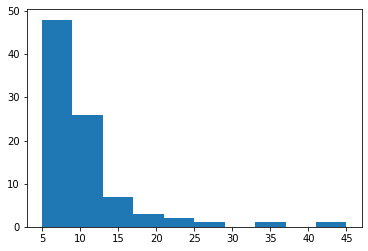

In [66]:
graus = np.array([v for c, v in QN1.degree()])
np.histogram(graus)

plt.hist(graus);

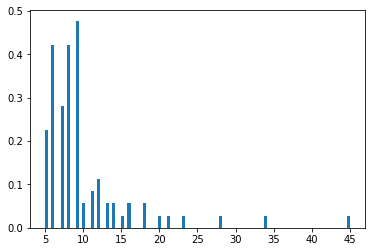

In [67]:
#np.histogram(graus, bins=100, density=True)

plt.hist(graus, bins=100, density=True);

## Distribuição de Graus para a Distribuição de probabilidade (PDF)

In [68]:
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import MinMaxScaler


In [69]:
def distribuicao_graus(G):
    return np.array([v for c, v in G.degree()]).reshape(-1,1)

In [70]:
def pdf_grau(G, h=5):
    graus = distribuicao_graus(G)
    kde = KernelDensity(kernel= 'gaussian', bandwidth=h).fit(graus)
    return kde

In [71]:
def pdf_grau_scalonado(G, h=0.5):
    graus = distribuicao_graus(G)
    scaler.fit(graus)
    graus = scaler.transform(graus)
    kde = KernelDensity(kernel= 'gaussian', bandwidth=h).fit(graus)
    return kde, scaler

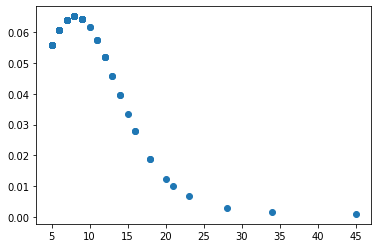

In [72]:
kde = pdf_grau(QN1, h=5)
graus = distribuicao_graus(QN1)
log_dens = np.exp(kde.score_samples(graus))
plt.scatter(graus, log_dens);

In [73]:
def H(G):
    graus = np.array([v for c, v in G.degree()])
    probabilidades, percentis = np.histogram(graus)
    probabilidades = probabilidades / np.sum(probabilidades)
    return -np.sum([k * np.log10(k) for k in probabilidades if k >0])

In [74]:
linhas = []

for nome, G in redes.items():
    
    metrica = H(G)
    linha = [nome, metrica]
    linhas.append(linha)
    
pd.DataFrame(linhas, columns=['Redes', 'H(G)'])

Redes      H(G)
0  EMPRESA ESTADO A  0.539974
1  EMPRESA ESTADO B  0.704669

## Grau Médio dos Vizinhos

In [75]:
knn = nx.average_degree_connectivity(QN1)



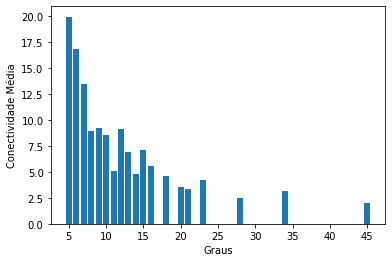

In [76]:
plt.bar([k for k in knn.keys()] , [k for k in knn.values()]);
plt.xlabel("Graus");
plt.ylabel("Conectividade Média");

## Assortividade

In [77]:
import warnings
warnings.filterwarnings("ignore")

In [78]:
linhas = []

for nome, G in redes.items():
    
    metrica = nx.degree_assortativity_coefficient(G)
    linha = [nome, metrica]
    linhas.append(linha)
    
pd.DataFrame(linhas, columns=['Redes', 'r'])

Redes    r
0  EMPRESA ESTADO A -inf
1  EMPRESA ESTADO B  inf

In [79]:
## (14) Compilando metricas globais da rede e comprando com as fases da pesquisa (Estado A = Fase 1 e Estado B = Fase 2)
linhas = []
for name, G in redes.items():
    linha = [name]
    
    linha.append(nx.radius(G.to_undirected()))
    linha.append(nx.diameter(G.to_undirected()))
    linha.append(nx.density(G.to_undirected()))
    linha.append(nx.average_clustering(G))
    linha.append(nx.global_efficiency(G.to_undirected()))
    linha.append(len(nx.minimum_edge_cut(G.to_undirected())))
    linha.append(h_index(G))
    linha.append(iN_index(G, 10))
    linha.append(g_index(G))
    linha.append(H(G))
    linha.append(nx.degree_assortativity_coefficient(G))
    
    linhas.append(linha)
    
pd.DataFrame(linhas, columns = ["Rede", "Rad", "Diam", "Dens", "Cluster", "Effic", "Min-Cut", 
                                "h-idex", "i10-index", "g-index", "H(G)", "r"])  

Rede  Rad  Diam      Dens   Cluster     Effic  Min-Cut  h-idex  \
0  EMPRESA ESTADO A    3     5  0.096527  0.242138  0.461730        5      13   
1  EMPRESA ESTADO B    3     4  0.091741  0.190702  0.455521        5      15   

   i10-index  g-index      H(G)    r  
0         24        8  0.539974 -inf  
1         29        8  0.704669  inf

## Teoria espectral de Grafos

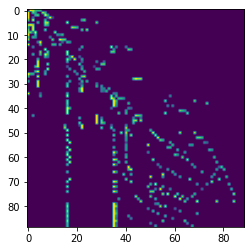

In [80]:
plt.imshow(nx.adjacency_matrix(QN1).toarray());

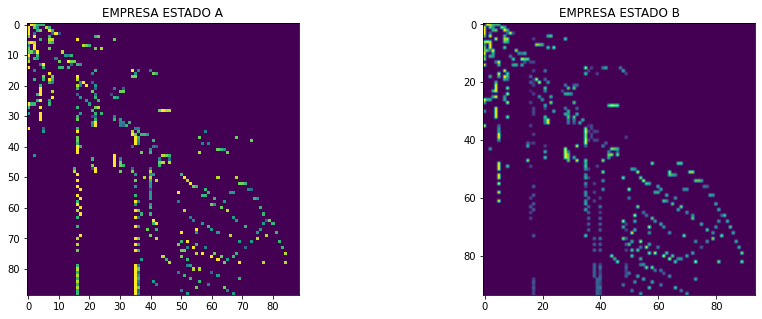

In [81]:
## (15) Plotando o espectro da matriz de adjacência dos grafos obtividos nas 2 fases da pesquisa, 
## (Estado A = Fase 1 e Estado B = Fase 2)

fig, ax = plt.subplots(1, 2, figsize=(15,5))
ct = 0
for nome, G in redes.items():
    ax[ct].imshow(nx.adjacency_matrix(G).toarray())
    ax[ct].set_title(nome)
    ct += 1

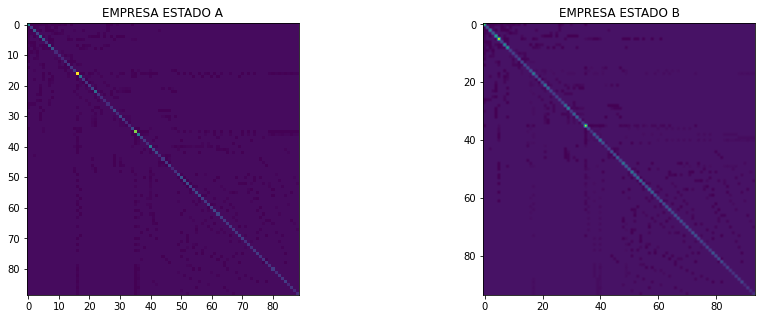

In [82]:
## (16) Plotando o espectro da matriz de Laplace dos grafos obtididos nas 2 fases da pesquisa,
## (Estado A = Fase 1 e Estado B = Fase 2)
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ct = 0
for nome, G in redes.items():
    ax[ct].imshow(nx.laplacian_matrix(G.to_undirected()).toarray())
    ax[ct].set_title(nome)
    ct += 1

In [83]:
nx.laplacian_spectrum(QN1.to_undirected())

array([-8.55526766e-19,  4.91743148e+00,  9.30426108e+00,  1.51122367e+01,
        1.67785711e+01,  1.88335314e+01,  1.99766195e+01,  2.09268026e+01,
        2.12748516e+01,  2.20889493e+01,  2.35760083e+01,  2.36589019e+01,
        2.40873896e+01,  2.45468523e+01,  2.62353610e+01,  2.67188513e+01,
        2.70474798e+01,  2.74729054e+01,  2.88637122e+01,  3.00861671e+01,
        3.05453304e+01,  3.06797490e+01,  3.22835278e+01,  3.25853355e+01,
        3.27293512e+01,  3.28917156e+01,  3.31984601e+01,  3.37768559e+01,
        3.50641579e+01,  3.57703935e+01,  3.58893578e+01,  3.65262241e+01,
        3.69385454e+01,  3.74771936e+01,  3.78507080e+01,  3.84973658e+01,
        3.98645161e+01,  4.11888096e+01,  4.15290513e+01,  4.21818387e+01,
        4.25959359e+01,  4.35374728e+01,  4.45317153e+01,  4.47822169e+01,
        4.52883211e+01,  4.56996091e+01,  4.67228515e+01,  4.78185704e+01,
        4.86552221e+01,  4.93598070e+01,  4.96840301e+01,  5.01007187e+01,
        5.17743680e+01,  

In [84]:
nx.algebraic_connectivity(QN1.to_undirected())

4.9174314829633055

## Comparando Grafos  - Distancia Euclidiana


In [85]:
def dist_euclidiana(Ga, Gb):
    if(Ga.number_of_nodes() != Gb.number_of_nodes()):
        return np.inf
    
    Aa = nx.adjacency_matrix(Ga).toarray()
    Ab = nx.adjacency_matrix(Gb).toarray()
    
    return np.linalg.norm(Aa - Ab)
    

In [86]:
linhas = []
colunas = []

for nome1, Ga in redes.items():
    linha = []
    colunas.append(nome1)
    for nome2, Gb in redes.items():
        d = dist_euclidiana(Ga.to_undirected(), Gb.to_undirected())
        linha.append(d)
    linhas.append(linha)
    
pd.DataFrame(linhas, columns=colunas, index=colunas)

EMPRESA ESTADO A  EMPRESA ESTADO B
EMPRESA ESTADO A               0.0               inf
EMPRESA ESTADO B               inf               0.0

In [87]:
linhas = []
colunas = []
norma = Ga.number_of_edges() + Gb.number_of_edges()

for nome1, Ga in redes.items():
    linha = []
    colunas.append(nome1)
    for nome2, Gb in redes.items():
        d = 1 - (dist_euclidiana(Ga.to_undirected(), Gb.to_undirected()) / norma)
        linha.append(d)
    linhas.append(linha)
    
pd.DataFrame(linhas, columns=colunas, index=colunas)

EMPRESA ESTADO A  EMPRESA ESTADO B
EMPRESA ESTADO A               1.0              -inf
EMPRESA ESTADO B              -inf               1.0

In [88]:
import netcomp as nc

In [89]:
linhas = []
colunas = []

for nome1, Ga in redes.items():
    linha = []
    colunas.append(nome1)
    for nome2, Gb in redes.items():
        
        A1 = nx.adjacency_matrix(Ga.to_undirected()).toarray()
        A2 = nx.adjacency_matrix(Gb.to_undirected()).toarray()
        
        d = nc.deltacon0(A1, A2)
        linha.append(d)
    linhas.append(linha)
        
pd.DataFrame(linhas, columns=colunas, index=colunas)

EMPRESA ESTADO A  EMPRESA ESTADO B
EMPRESA ESTADO A          0.000000        257.408705
EMPRESA ESTADO B        257.408705          0.000000

In [90]:
from B_matrix import portrait

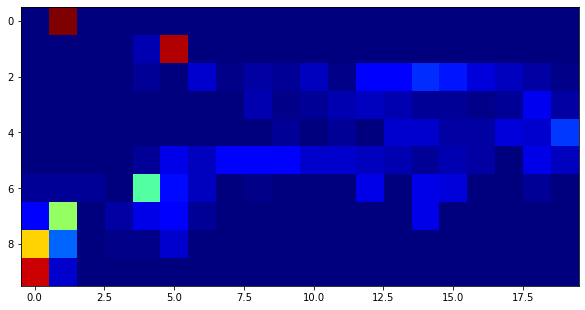

In [91]:
B = portrait(QN1)

fig, ax = plt.subplots(1, 1, figsize=(10, 15))

ax.imshow(B[:,:20], cmap='jet');

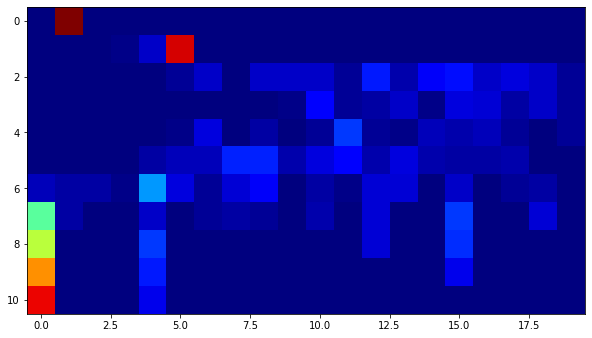

In [92]:
B = portrait(QN2)

fig, ax = plt.subplots(1, 1, figsize=(10, 15))

ax.imshow(B[:,:20], cmap='jet');

## Descritores de Redes

In [93]:
## (17) Descritores de redes
from sklearn.preprocessing import MinMaxScaler

In [94]:
linhas = []

for nome, G in redes.items():
    linha = [
        nx.radius(G.to_undirected()),
        nx.diameter(G.to_undirected()),
        nx.density(G.to_undirected()),
        nx.average_clustering(G.to_undirected()),
        nx.global_efficiency(G.to_undirected()),
        nx.degree_assortativity_coefficient(G.to_undirected()),
        nx.node_connectivity(G.to_undirected()),
        nx.edge_connectivity(G.to_undirected())
    ]
    
    linhas.append(linha)
    
descritores = np.array(linhas)
    
    
scaler = MinMaxScaler()
scaler.fit(descritores)
linhas = scaler.transform(descritores)
    
#descritores

In [95]:
linhas = []
colunas = []
for c1, nome1 in enumerate(redes.keys()):
    linha = []
    colunas.append(nome1)
    for c2, nome2 in enumerate(redes.keys()):
        a = descritores[c1]
        b = descritores[c2]
        d = np.linalg.norm(a-b)
        linha.append(d)
    linhas.append(linha)
    
pd.DataFrame(linhas, columns=colunas, index=colunas)
    

EMPRESA ESTADO A  EMPRESA ESTADO B
EMPRESA ESTADO A          0.000000          1.008102
EMPRESA ESTADO B          1.008102          0.000000

In [96]:
num_metricas = 8

linhas = []
colunas = []
for c1, nome1 in enumerate(redes.keys()):
    linha = []
    colunas.append(nome1)
    for c2, nome2 in enumerate(redes.keys()):
        a = descritores[c1]
        b = descritores[c2]
        d = 1 - (np.linalg.norm(a-b) / num_metricas)
        linha.append(d)
    linhas.append(linha)
    
pd.DataFrame(linhas, columns=colunas, index=colunas)

EMPRESA ESTADO A  EMPRESA ESTADO B
EMPRESA ESTADO A          1.000000          0.873987
EMPRESA ESTADO B          0.873987          1.000000

In [ ]:
linhas = []
colunas = []

for nome1, Ga in redes.items():
    linha = []
    colunas.append(nome1)
    for nome2, Gb in redes.items():
        
        A1 = nx.adjacency_matrix(Ga).toarray()
        A2 = nx.adjacency_matrix(Gb).toarray()
        
        d = nc.netsimile(A1, A2)
        
        linha.append(d)
    linhas.append(linha)
        
pd.DataFrame(linhas, columns=colunas, index=colunas)

In [98]:
linhas = []
colunas = []

for nome1, Ga in redes.items():
    linha = []
    colunas.append(nome1)
    for nome2, Gb in redes.items():
        
        A1 = nx.adjacency_matrix(Ga.to_undirected()).toarray()
        A2 = nx.adjacency_matrix(Gb.to_undirected()).toarray()
        
        d = nc.lambda_dist(A1, A2, kind='laplacian_norm')
        
        linha.append(d)
    linhas.append(linha)
        
pd.DataFrame(linhas, columns=colunas, index=colunas)

EMPRESA ESTADO A  EMPRESA ESTADO B
EMPRESA ESTADO A          0.000000          0.360619
EMPRESA ESTADO B          0.360619          0.000000

In [99]:
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import MinMaxScaler

def dist_graus(G):
    return np.array([k for v,k in nx.degree(G)])

def scaled_dist_graus(G):
    graus_unicos = dist_graus(G).reshape(-1, 1)
    scaler = MinMaxScaler()
    scaler.fit(graus_unicos)
    graus = scaler.transform(graus_unicos)
    return graus

def distribuicoes(G):
    graus = scaled_dist_graus(G)
    freq, graus = np.histogram(graus, bins=10)
    P1 = freq / np.sum(freq)
    P = [np.sum(P1[i-1:i+2])/3 for i in range(1, len(P1)-1)]
    P.insert(0, P1[0])
    P.append(P1[-1])
    #kde = KernelDensity(kernel = 'gaussian', bandwidth=0.1).fit(graus)
    #P = np.exp(kde.score_samples(graus))
    F = [0]
    for k in P:
        F.append(k + F[-1])
    F.remove(0)
    
    return P, F, graus
    

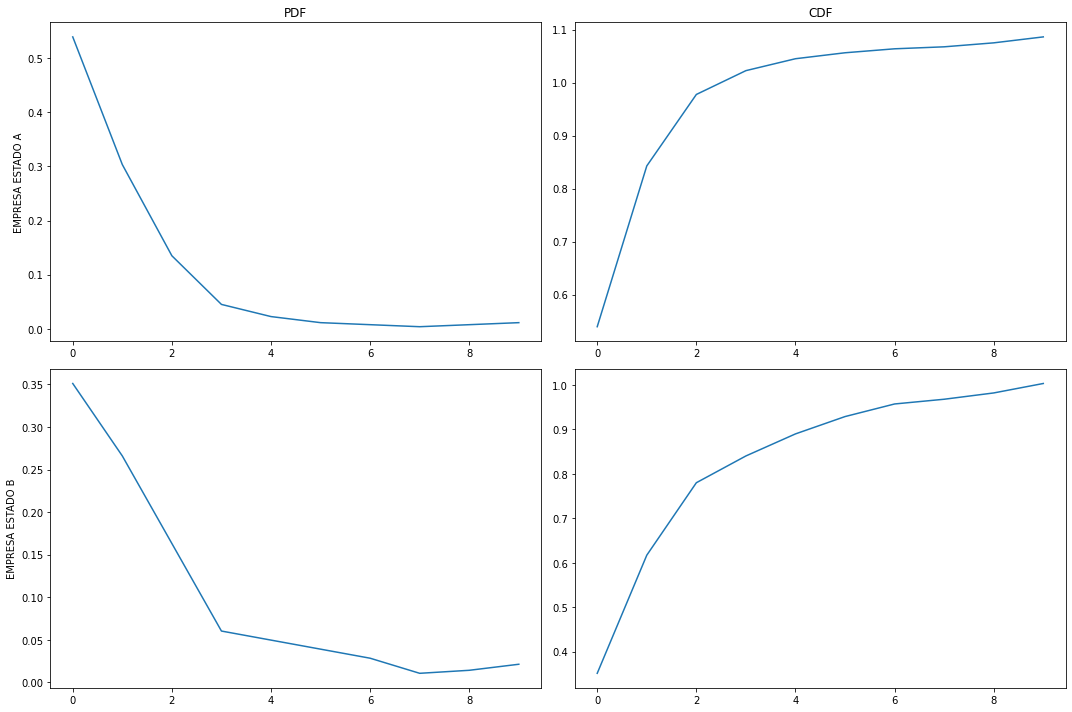

In [100]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for ct, (nome, G) in enumerate(redes.items()):
    P, F, graus = distribuicoes(G)
    ax[ct][0].plot(P)
    if ct == 0:
        ax[ct][0].set_title("PDF")
        ax[ct][1].set_title("CDF")
    ax[ct][0].set_ylabel(nome)
    ax[ct][1].plot(F)
    
plt.tight_layout()
                    

In [101]:
from pyinform.dist import Dist
from pyinform.shannon import mutual_info
from itertools import product
from pyinform.shannon import relative_entropy



In [102]:
linhas = []
colunas = []
for nome1, Ga in redes.items():
    linha = []
    colunas.append(nome1)
    for nome2, Gb in redes.items():
        dA = dist_graus(Ga)
        dB = dist_graus(Gb)
        dAB = [17*a+7*b for a,b in zip(dA,dB)]
        
        pAB = Dist(dAB)
        pA = Dist(dA)
        pB = Dist(dB)
        d = mutual_info(pAB, pA, pB, b=10)
        
        linha.append(d)
        
    linhas.append(linha)
pd.DataFrame(linhas, columns=colunas, index = colunas)
    
        
        
        
    
    

EMPRESA ESTADO A  EMPRESA ESTADO B
EMPRESA ESTADO A          1.888558          1.916757
EMPRESA ESTADO B          1.909659          1.927564

In [103]:
linhas = []
colunas = []
for nome1, Ga in redes.items():
    linha = []
    colunas.append(nome1)
    for nome2, Gb in redes.items():
        
        dA = dist_graus(Ga)
        dB = dist_graus(Gb)
               
      
        pA = Dist(dA)
        pB = Dist(dB)
        d = relative_entropy(pA, pB)
        
        linha.append(d)
        
    linhas.append(linha)
pd.DataFrame(linhas, columns=colunas, index = colunas)
    

EMPRESA ESTADO A  EMPRESA ESTADO B
EMPRESA ESTADO A               0.0               NaN
EMPRESA ESTADO B               NaN               0.0

In [104]:
linhas = []
colunas = []

for nome1, Ga in redes.items():
    linha = []
    colunas.append(nome1)
    for nome2, Gb in redes.items():
        
        A1 = nx.adjacency_matrix(Ga.to_undirected()).toarray()
        A2 = nx.adjacency_matrix(Gb.to_undirected()).toarray()
        
        d = nc.lambda_dist(A1, A2, kind='laplacian_norm')
        
        linha.append(d)
    linhas.append(linha)
        
pd.DataFrame(linhas, columns=colunas, index=colunas)

EMPRESA ESTADO A  EMPRESA ESTADO B
EMPRESA ESTADO A          0.000000          0.360619
EMPRESA ESTADO B          0.360619          0.000000

In [ ]:
linhas = []
colunas = []

for nome1, Ga in redes.items():
    linha = []
    colunas.append(nome1)
    for nome2, Gb in redes.items():
        
        A1 = nx.adjacency_matrix(Ga.to_undirected()).toarray()
        A2 = nx.adjacency_matrix(Gb.to_undirected()).toarray()
        
        d = nc.edit_distance(A1, A2)
        
        linha.append(d)
    linhas.append(linha)
        
pd.DataFrame(linhas, columns=colunas, index=colunas)

## Modularidade

In [106]:
import pygraphviz
from networkx.algorithms import community


In [107]:
def dens_in(G, comunidade):
    C = G.subgraph(comunidade)
    m = G.number_of_edges()
    mi = C.number_of_edges()
    return mi/m

def dens_out(G, comunidade):
    C = G.subgraph(comunidade)
    Cc = G.copy()
    for u,v in C.edges():
        Cc.remove_edge(u, v)
    mi = np.sum([1 for k in Cc.edges(comunidade)])
    m = G.number_of_edges()
    return mi/m

def avaliar_comunidades(G, comunidades):
    linhas = []
    for ct, comunidade in enumerate(comunidades):
        linha = ['C{}'.format(ct)]
        linha.append(dens_in(G, comunidade))
        linha.append(dens_out(G, comunidade))
        linhas.append(linha)
    return pd.DataFrame(linhas, columns=['Comunidade', 'dens_in', 'dens_out'])



In [108]:
from networkx.drawing.nx_agraph import graphviz_layout

def draw(G, comunidades, prog='fdp'):
    cores_padrao = ['blue', 'red', 'green', 'orange', 'yellow', 'brown', 'purple', 'gray', 'cyan']
    cores_padrao2 = ['lightblue', 'indianred', 'limegreen', 'lightsalmon', 'yellow', 'sandybrown', 'violet', 'lightgray', 'aqua']
    
    fig, ax  = plt.subplots(1,1, figsize=(7,7))
    
    pos = graphviz_layout(G, prog=prog)
    
    vertices = []
    arestas = []
    cores_vertices = []
    coes_arestas = []
    legenda_paths = []
    legenda_nomes = []
    path = nx.draw_networkx_nodes(G, pos=pos, node_color='darkgray', ax=ax)
    legenda_paths.append(path)
    legenda_nomes.append("Sem Com.")
    nx.draw_networkx_edges(G, pos=pos, edge_color='lightgray', ax=ax)
    for ct, comunidade in enumerate(comunidades):
        if ct < 9:
            vertices = [v for v in comunidade]
            cores_vertices = [cores_padrao[ct] for v in comunidade]
            sg = G.subgraph(comunidade)
            arestas = [k for k in sg.edges()]
            cores_arestas = [cores_padrao2[ct] for k in sg.edges()]
            path = nx.draw_networkx_nodes(G, pos=pos, nodelist=vertices, node_color=cores_vertices, ax=ax)
            legenda_paths.append(path)
            legenda_nomes.append('C{}'.format(ct))
            nx.draw_networkx_edges(G, pos=pos, edgelist=arestas, edge_color=cores_arestas, ax=ax)
            
    ax.legend(legenda_paths, legenda_nomes)
    
    
    
    

In [109]:
iterador = community.k_clique_communities(QN1.to_undirected(), 5)
for k in iterador:
    print(k)

frozenset({'Fiscal', 'Contratos', 'Financeiro', 'Diretor comercial', 'Contas a pagar', 'Diretor técnico'})
frozenset({'Lider de planejamento2', 'Contratos', 'Diretor comercial', 'Lider da Engenharia', 'Suprimento 2', 'Diretor técnico', 'Vendedor'})
frozenset({'Inspetor de Pintura', 'Pintor 2', 'Movimentação e patio 2', 'Movimentação e patio 1', 'Movimentação e patio 3', 'Pintor 3', 'Lider da Pintura', 'Pintor 1'})
frozenset({'Auxiliar de expedição 2', 'Movimentação e patio 2', 'Movimentação e patio 1', 'Lider de planejamento1', 'Auxiliar de expedição 1', 'Movimentação e patio 3', 'Lider de expedição'})
frozenset({'Lider da produção 1', 'Lider da Qualidade', 'Encarregado da produção 1', 'Encarregado da Solda 1', 'Encarregado da produção 2'})


  Comunidade   dens_in  dens_out
0         C0  0.034913  0.067332
1         C1  0.057357  0.084788
2         C2  0.054863  0.079800
3         C3  0.044888  0.092269
4         C4  0.024938  0.209476


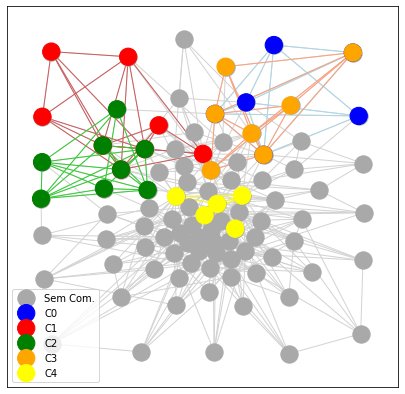

In [110]:
G = QN2.to_undirected()
iterador = community.k_clique_communities(G, 5)
comunidades = [k for k in iterador]
print(avaliar_comunidades(G, comunidades))
draw(G, comunidades)



## Algoritimo de Girvan Newman

In [111]:
iterador = community.girvan_newman(QN2.to_undirected())


  Comunidade   dens_in  dens_out
0         C0  0.319202  0.089776
1         C1  0.591022  0.089776


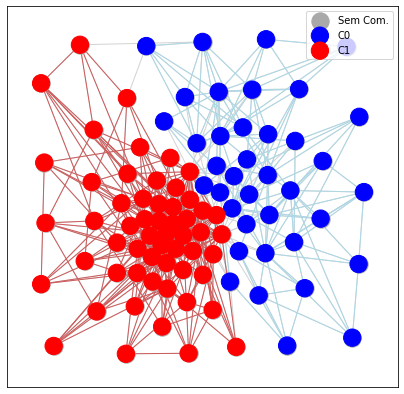

In [112]:
G = QN2.to_undirected()
comunidades = [k for k in next(iterador)]
print(avaliar_comunidades(G, comunidades))
draw(G, comunidades)

In [113]:
import community as community_louvain

In [114]:
from community import community_louvain

def dict_para_list(dicionario):
    ncomunidades = {v for v in dicionario.values()}
    comunidades = [[] for k in ncomunidades]
    for vertice, comunidade in dicionario.items():
        comunidades[comunidade].append(vertice)
    return comunidades
    
    

## Algoritimo de Louvain

  Comunidade   dens_in  dens_out
0         C0  0.142145  0.107232
1         C1  0.127182  0.084788
2         C2  0.206983  0.259352
3         C3  0.012469  0.037406
4         C4  0.122195  0.172070
5         C5  0.024938  0.067332


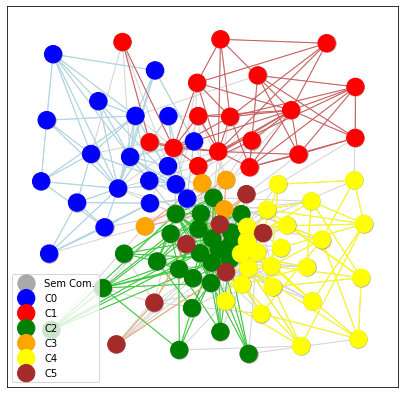

In [115]:
G = QN2.to_undirected()
dicionario = community_louvain.best_partition(G)
comunidades = dict_para_list(dicionario)
print(avaliar_comunidades(G, comunidades))
draw(G, comunidades)

## mesclando novas visualizações

In [119]:
from pyvis.network import Network

g = Network()
g.add_node(0)
g.add_node(1)
g.add_edge(0, 1)
g.show("basic.html")

In [118]:
G = QN2.to_undirected()

In [133]:
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)



#Setting up node size attribute
nx.set_node_attributes(G,  node_degree, 'size')

net.from_nx(G)
net.show("G1.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [121]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Diretor técnico': 0.1827956989247312,
 'Diretor comercial': 0.07526881720430108,
 'Contratos': 0.12903225806451613,
 'Fiscal': 0.09677419354838711,
 'Lider de planejamento1': 0.15053763440860216,
 'Lider da produção 1': 0.24731182795698928,
 'Vendedor': 0.05376344086021506,
 'Lider da Engenharia': 0.13978494623655915,
 'Lider de planejamento2': 0.15053763440860216,
 'Financeiro': 0.05376344086021506,
 'RH1': 0.05376344086021506,
 'Contas a pagar': 0.05376344086021506,
 'QSMS': 0.05376344086021506,
 'TST': 0.07526881720430108,
 'RH2': 0.06451612903225806,
 'Técnico em documentação': 0.06451612903225806,
 'Encarregado da produção 1': 0.1827956989247312,
 'Encarregado da produção 2': 0.2903225806451613,
 'Engenheiro 1': 0.06451612903225806,
 'Técnico em processos 1': 0.07526881720430108,
 'Técnico em processos 2': 0.07526881720430108,
 'Movimentação e patio 1': 0.16129032258064518,
 'Lider de expedição1': 0.08602150537634409,
 'Técnico em Planejamento 1': 0.06451612903225806,
 'Técnico 

<AxesSubplot:>

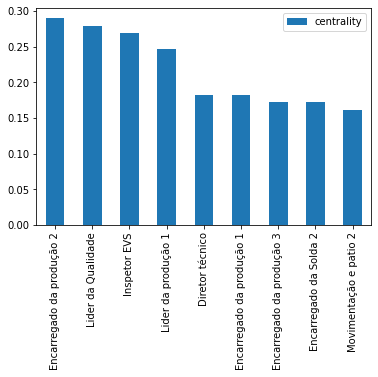

In [122]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

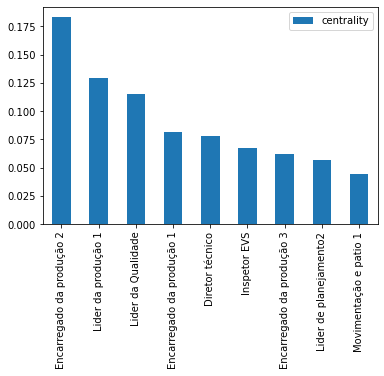

In [123]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

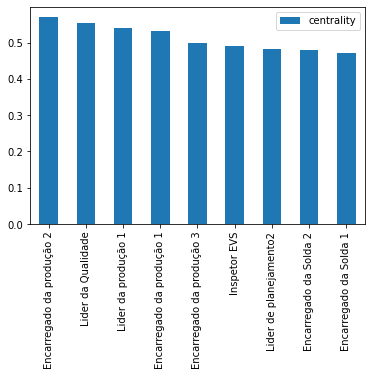

In [124]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [125]:
## (18) Plotando a rede complexa com suas comunidades destacadas.
import community as community_louvain

In [126]:
communities = community_louvain.community_louvain.best_partition(G)

In [127]:
#communities

In [128]:
nx.set_node_attributes(G, communities, 'group')

In [129]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
nx.set_node_attributes(G, node_degree, 'size')
com_net.from_nx(G)
com_net.show("witcher_communities.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


## Tabela 1: Dados complilados do questionario da fase 1

In [337]:
df1

Source                     Target  Weight
0           Diretor técnico          Diretor comercial       9
1           Diretor técnico                  Contratos       8
2           Diretor técnico                     Fiscal       6
3           Diretor técnico     Lider de planejamento1       6
4           Diretor técnico        Lider da produção 1       6
..                      ...                        ...     ...
440  Movimentação e patio 3     Lider de planejamento1       9
441  Movimentação e patio 3  Encarregado da produção 1       7
442  Movimentação e patio 3           Lider da Pintura       6
443  Movimentação e patio 3         Lider de expedição       6
444  Movimentação e patio 3     Movimentação e patio 2       5

[445 rows x 3 columns]

#### Fonte: Resultados originais da pesquisa

## Tabela 2: Dados complilados do questionario da fase 2

In [338]:
df2

Source                     Target  Weight
0           Diretor técnico          Diretor comercial       9
1           Diretor técnico                  Contratos       8
2           Diretor técnico                     Fiscal       6
3           Diretor técnico     Lider de planejamento1       6
4           Diretor técnico        Lider da produção 1       6
..                      ...                        ...     ...
465  Movimentação e patio 3     Lider de planejamento1       9
466  Movimentação e patio 3  Encarregado da produção 2       7
467  Movimentação e patio 3           Lider da Pintura       6
468  Movimentação e patio 3        Lider de expedição2       6
469  Movimentação e patio 3     Movimentação e patio 2       5

[470 rows x 3 columns]

#### Fonte: Resultados originais da pesquisa